In [5]:
import pymongo
import numpy as np
import matplotlib.pyplot as plt

from dateutil import parser
from wordcloud import WordCloud
from scripts import MONGO_URL
from scripts.analysis import data, plot

plot.init_matplotlib()


def get_corpus(repo_names: list[str]) -> tuple[dict[str, int], list[list[str]]]:
    word_freq = {}
    text_corpora = []
    for repo in repo_names:
        repo_name = repo.split("/")[1]
        text = []
        for x in repo_name.split("-"):
            for y in x.split("_"):
                for word in y.split("."):
                    if len(word) <= 1:
                        continue
                    word = word.lower()
                    if word in word_freq:
                        word_freq[word] += 1
                        text.append(word)
                    else:
                        word_freq[word] = 1
                        text.append(word)
        if len(text) > 0:
            text_corpora.append(text)
    return word_freq, text_corpora

In [7]:
repos = data.get_fake_star_repos()
repos_with_campaign = data.get_repos_with_campaign()
repos = repos[repos.repo_name.isin(repos_with_campaign)]
repo_to_active, missing = dict(), 0
with pymongo.MongoClient(MONGO_URL) as client:
    for repo in repos_with_campaign:
        events = list(
            client.fake_stars.fake_repo_events.find({"repo": repo}).sort(
                "created_at", pymongo.ASCENDING
            )
        )
        if len(events) == 0:
            repo_to_active[repo] = np.nan
        else:
            repo_to_active[repo] = (
                parser.parse(events[-1]["created_at"])
                - parser.parse(events[0]["created_at"])
            ).days + 1
repos["active_days"] = repos.repo_name.map(lambda x: repo_to_active[x])

[('bot', 1030), ('crack', 705), ('2024', 701), ('adobe', 546), ('free', 536), ('auto', 509), ('pro', 470), ('activation', 435), ('autoclicker', 391), ('crypto', 301), ('hack', 296), ('cracked', 259), ('version', 254), ('ai', 248), ('generator', 236), ('main', 229), ('wallet', 222), ('executor', 191), ('studio', 186), ('download', 185)]


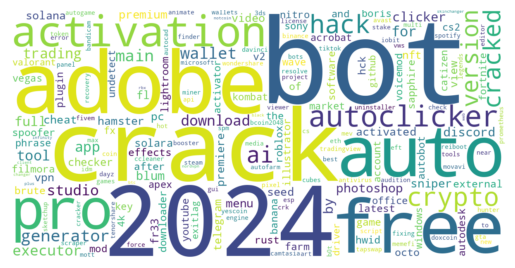

In [7]:
word_freq, text_corpora = get_corpus(repos_with_campaign)
print(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
wordcloud = WordCloud(
    width=1200, height=600, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("plots/wordcloud.pdf", bbox_inches="tight")

[('bot', 954), ('crack', 700), ('2024', 681), ('adobe', 538), ('free', 518), ('auto', 503), ('pro', 464), ('activation', 434), ('autoclicker', 384), ('crypto', 297), ('hack', 294), ('cracked', 256), ('version', 250), ('ai', 232), ('generator', 225), ('main', 223), ('wallet', 214), ('executor', 188), ('studio', 183), ('download', 181)]


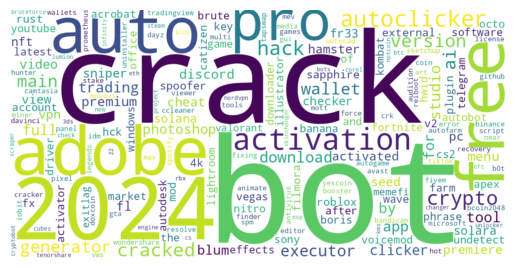

In [4]:
# deleted repos
word_freq, text_corpora = get_corpus(
    repos_with_campaign & set(repos[repos.repo_id.isna()].repo_name)
)
print(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
wordcloud = WordCloud(
    width=1200, height=600, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("plots/wordcloud-deleted.pdf", bbox_inches="tight")

[('bot', 76), ('telegram', 29), ('sniper', 22), ('app', 21), ('api', 20), ('2024', 20), ('project', 19), ('free', 18), ('github', 17), ('android', 17), ('token', 17), ('products', 16), ('sdk', 16), ('ai', 16), ('dart', 15), ('web', 14), ('azkadev', 14), ('solana', 14), ('face', 13), ('create', 13)]


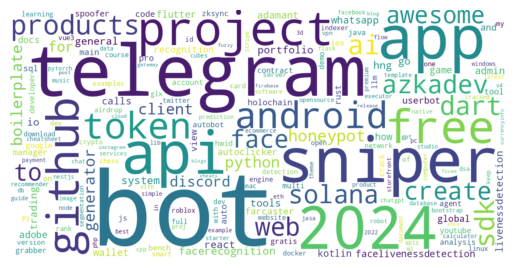

In [5]:
word_freq, text_corpora = get_corpus(
    repos_with_campaign & set(repos[repos.repo_id.notna()].repo_name)
)
print(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
wordcloud = WordCloud(
    width=1200, height=600, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("plots/wordcloud-nondeleted.pdf", bbox_inches="tight")

[('bot', 40), ('telegram', 28), ('products', 16), ('dart', 15), ('api', 15), ('azkadev', 14), ('app', 13), ('github', 12), ('ai', 10), ('web', 9), ('client', 9), ('sdk', 8), ('adamant', 8), ('whatsapp', 8), ('to', 8), ('project', 7), ('face', 7), ('token', 7), ('userbot', 7), ('global', 7)]


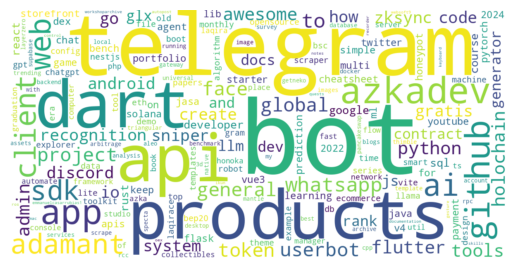

In [10]:
word_freq, text_corpora = get_corpus(
    repos_with_campaign
    & set(repos[repos.repo_id.notna() & (repos.active_days >= 90)].repo_name)
)
print(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
wordcloud = WordCloud(
    width=1200, height=600, background_color="white", colormap="viridis"
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("plots/wordcloud-nondeleted.pdf", bbox_inches="tight")

In [12]:
repos[repos.repo_id.notna() & (repos.active_days >= 30)]

,repo_id,repo_name,n_stars,n_stars_latest,n_stars_low_activity,p_stars_low_activity,n_stars_clustered,p_stars_clustered,p_stars_fake,active_days
678,R_kgDOJLNGUg,mr-teslaa/ai-introduction-uni-course,171.0,17.0,0.0,0.0,171.0,1.000000,1.000000,472.0
806,R_kgDOKHrCPg,riazsha/cardanimation,52.0,51.0,0.0,0.0,52.0,1.000000,1.000000,299.0
814,R_kgDOKJn0iw,riazsha/gemstay,86.0,92.0,0.0,0.0,86.0,1.000000,1.000000,300.0
907,R_kgDOJhMFXg,alpereneskici/azure-pipline-test,53.0,0.0,0.0,0.0,53.0,1.000000,1.000000,342.0
943,R_kgDOJzAVjA,mr-teslaa/sentiment-analysis-api,186.0,24.0,0.0,0.0,186.0,1.000000,1.000000,376.0
...,...,...,...,...,...,...,...,...,...,...
18705,MDEwOlJlcG9zaXRvcnk4NjA5NTEyMw==,coells/100days,1480.0,7470.0,0.0,0.0,168.0,0.113514,0.113514,1920.0
18724,MDEwOlJlcG9zaXRvcnkyNDY3Njg2MTE=,Adamant-im/adamant-tradebot,574.0,538.0,0.0,0.0,64.0,0.111498,0.111498,1663.0
18731,R_kgDOKX2BYQ,ethstorage/es-node,946.0,1143.0,0.0,0.0,105.0,0.110994,0.110994,327.0
18795,MDEwOlJlcG9zaXRvcnkxNTQ3OTczOTE=,Adamant-im/ETH-transactions-storage,647.0,616.0,0.0,0.0,68.0,0.105100,0.105100,1863.0


In [6]:
from pprint import pprint
import gensim
from gensim import corpora

# Create Dictionary
id2word = corpora.Dictionary(text_corpora)
corpus = [id2word.doc2bow(text) for text in text_corpora]
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=10)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"facerecognition" + 0.011*"android" + 0.010*"react" + '
  '0.008*"products" + 0.008*"bot" + 0.008*"dart" + 0.008*"livenessdetection" + '
  '0.008*"2024" + 0.008*"github" + 0.007*"project"'),
 (1,
  '0.015*"ai" + 0.012*"azkadev" + 0.010*"products" + 0.010*"api" + '
  '0.008*"telegram" + 0.008*"token" + 0.008*"bot" + 0.008*"python" + '
  '0.006*"create" + 0.006*"awesome"'),
 (2,
  '0.012*"web" + 0.012*"boilerplate" + 0.009*"hng" + 0.005*"sdk" + '
  '0.005*"crack" + 0.005*"to" + 0.005*"livenessdetection" + 0.005*"algorithm" '
  '+ 0.005*"sniper" + 0.005*"bot"'),
 (3,
  '0.017*"bot" + 0.014*"project" + 0.012*"face" + 0.012*"api" + 0.010*"sdk" + '
  '0.010*"app" + 0.008*"solana" + 0.008*"recognition" + 0.008*"global" + '
  '0.007*"analysis"'),
 (4,
  '0.034*"bot" + 0.017*"2024" + 0.015*"telegram" + 0.013*"dart" + '
  '0.012*"sniper" + 0.008*"calls" + 0.008*"portfolio" + 0.006*"image" + '
  '0.006*"trading" + 0.006*"wallet"'),
 (5,
  '0.012*"sdk" + 0.012*"android" + 0.008*"web"